In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Load Dataset
data = pd.read_csv('kc_house_data.csv')
df = pd.DataFrame(data)
df.head() #Display first 5 rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
print(df.isnull().sum(),'\n\n')
print(df.info(),'\n\n')
print(df.nunique())
print(df[df.duplicated()])

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597

# Data Cleaning

In [4]:
df['waterfront'] = df['waterfront'].fillna(0.0) #Fill null values with median value
df['yr_renovated'] = df['yr_renovated'].fillna(0.0) #Fill null values with median value
df['sqft_basement'] = df.sqft_basement.replace('?','0.0') 
#replace extraneous data with because we are unsure of the home has a basement

In [6]:
#Cols to drop lat, long, sqft_living15, sqft_lot15, id,these cols don't contrubte to whether or not someone would buy a house
df = df.drop(['lat', 'long', 'sqft_living15', 'sqft_lot15', 'id','view'], axis=1)

In [7]:
df = df.drop(15856, axis=0) #Outlier - 33 bedrooms, but 1.75 bath, and 1620 sqrt. Could be a typo

In [19]:
#Converting the Datetime Frame into a proper datetime object
df['date'] = df['date'].astype('datetime64[ns]') 
#Converting the 'sqft_basement' from object to a float datatype
df['sqft_basement'] = df['sqft_basement'].astype('float64')

In [20]:
#Converting the 'yr_renovated column' into a new binary data column
for index in df.yr_renovated:    
    if index == 0:
        df['is_renovated'] = 0.0
    elif index > 0:
        df['is_renovated'] = 1.0
df.loc[df['yr_renovated'] > 0.0 , 'is_renovated'] = 1.0

In [18]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,is_renovated
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,0.0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1.0
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,0.0,98028,0.0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,0.0
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,0.0


# EDA ANALYSIS

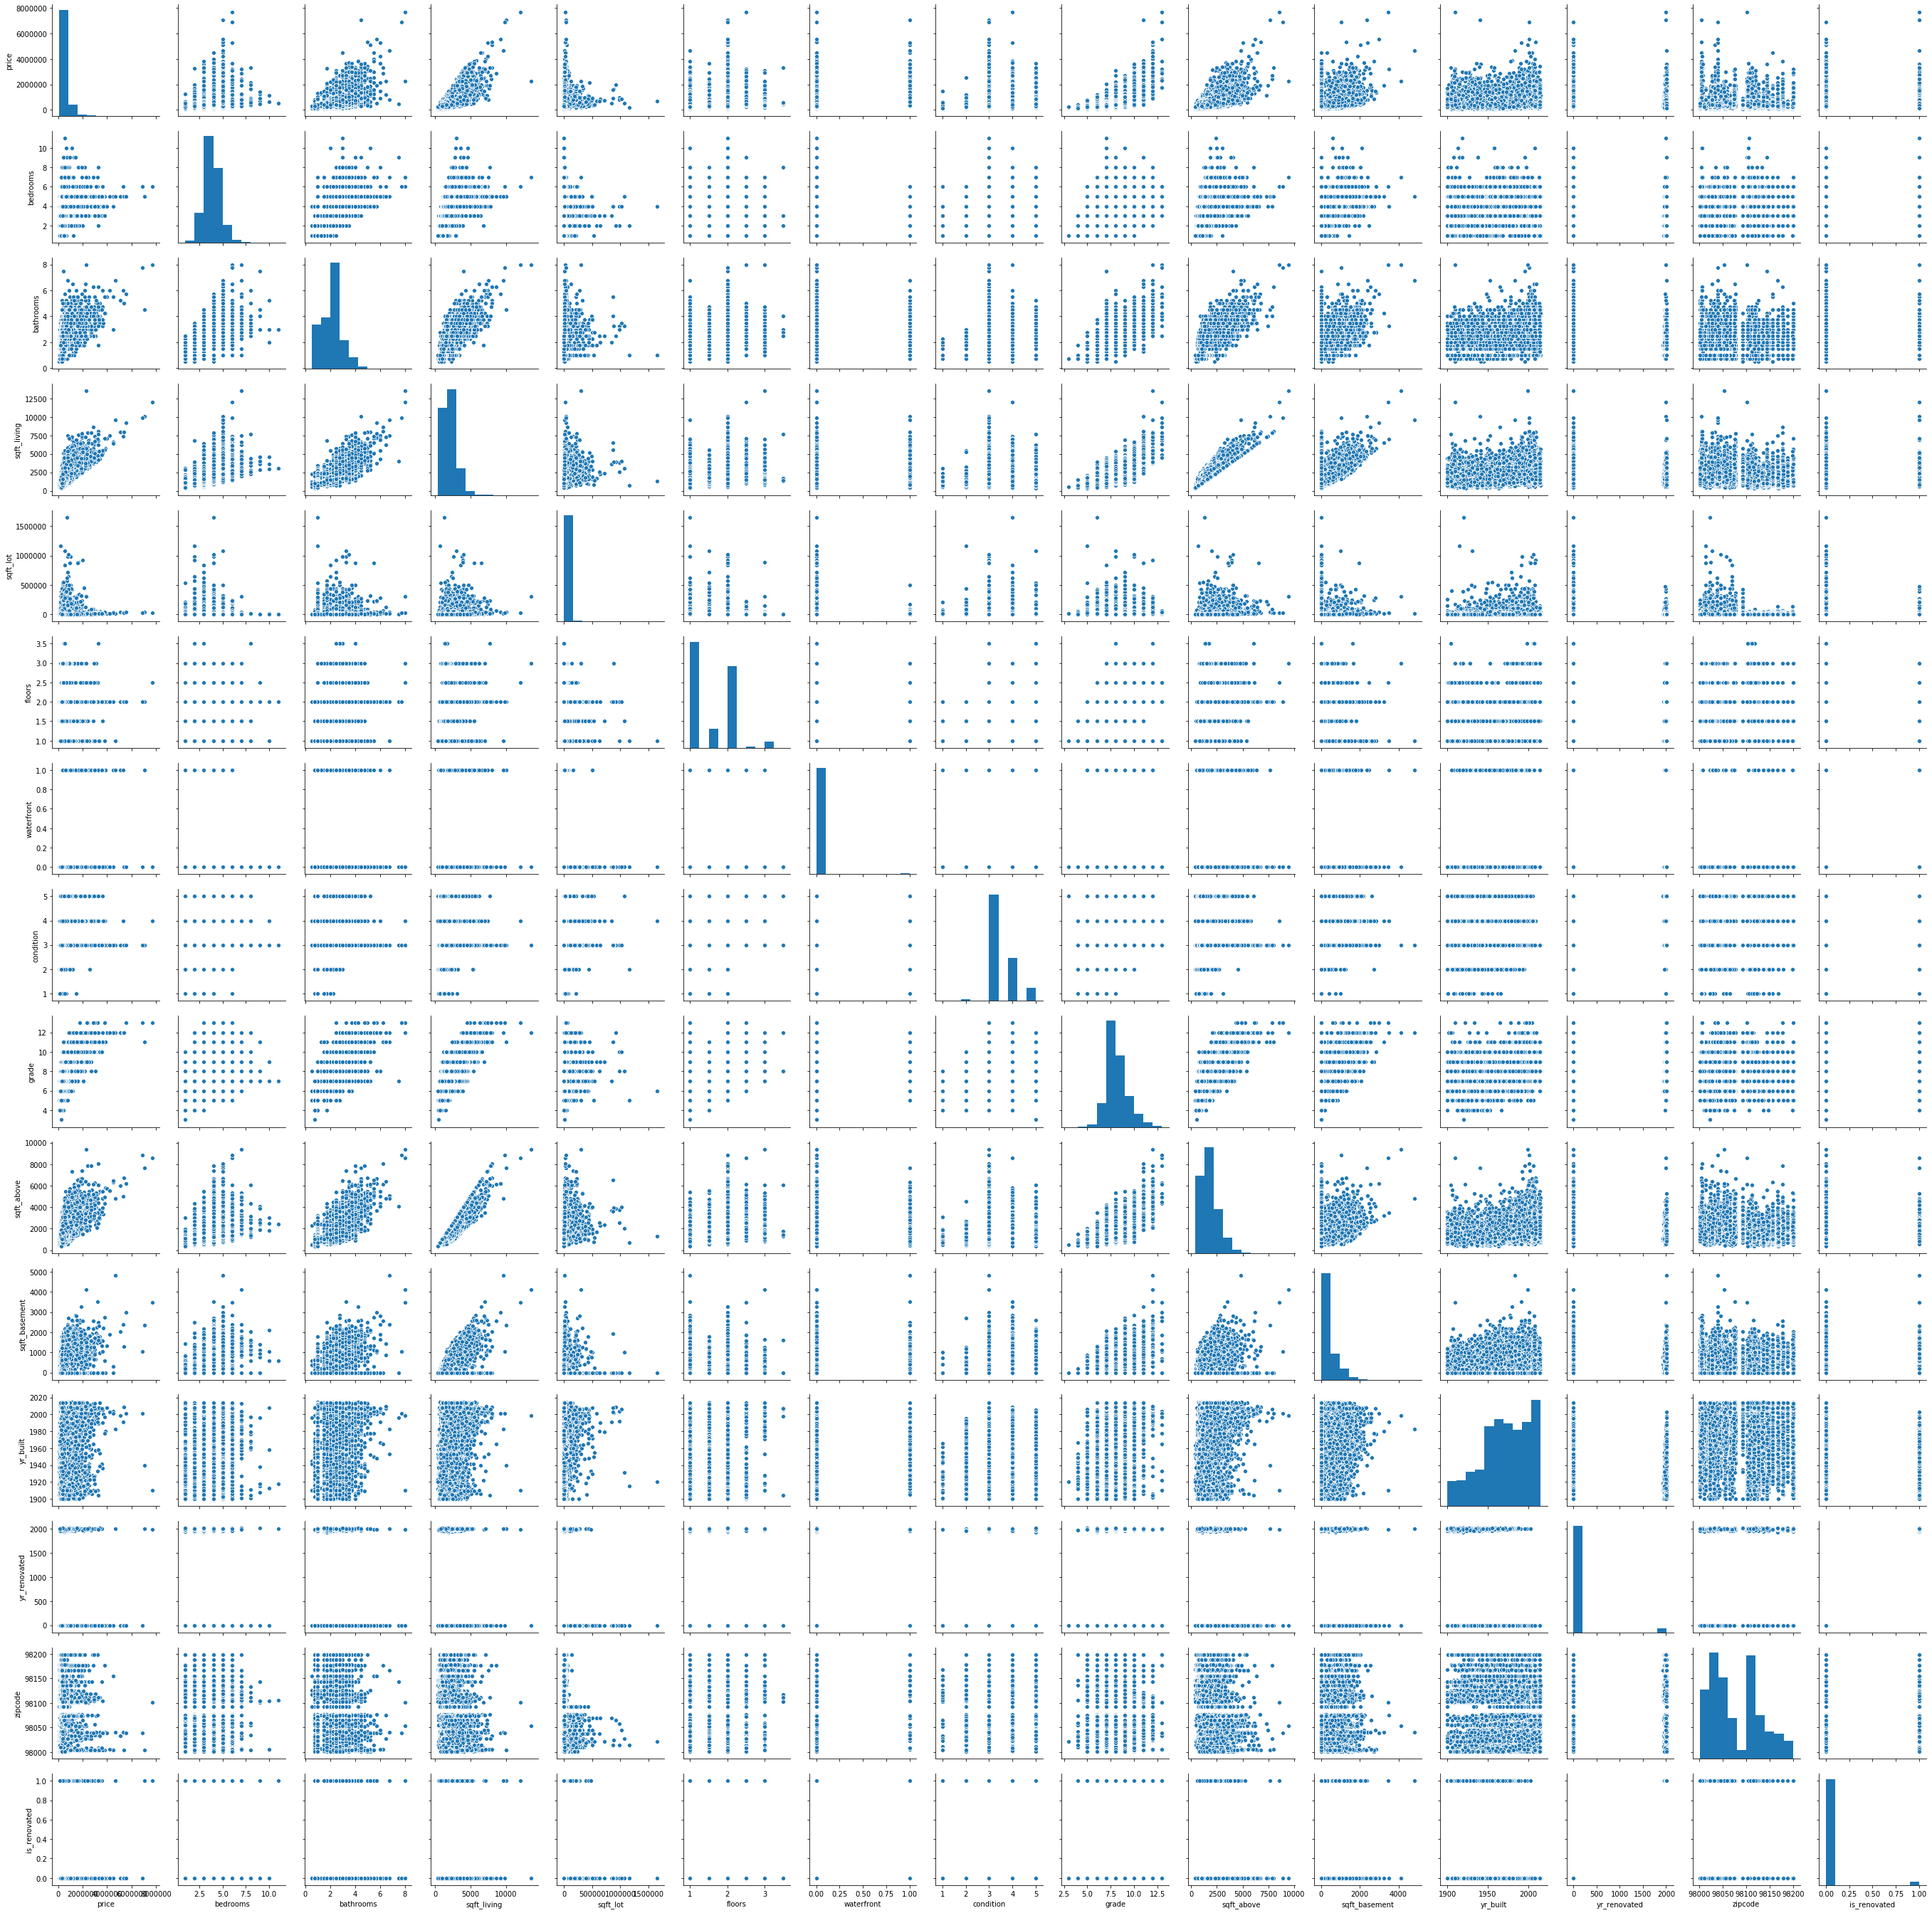

In [35]:
#Visualizing the pairplot to see the linearity among the independent variables
sns.pairplot(df)

In [34]:
# Dividing the columns into Continous and Categorical dataset for later use.
continuous = ['price','sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built','date']
categorical = ['bedrooms', 'bathrooms', 'floors', 'zipcode', 'grade', 'condition', 'waterfront','is_renovated'] 

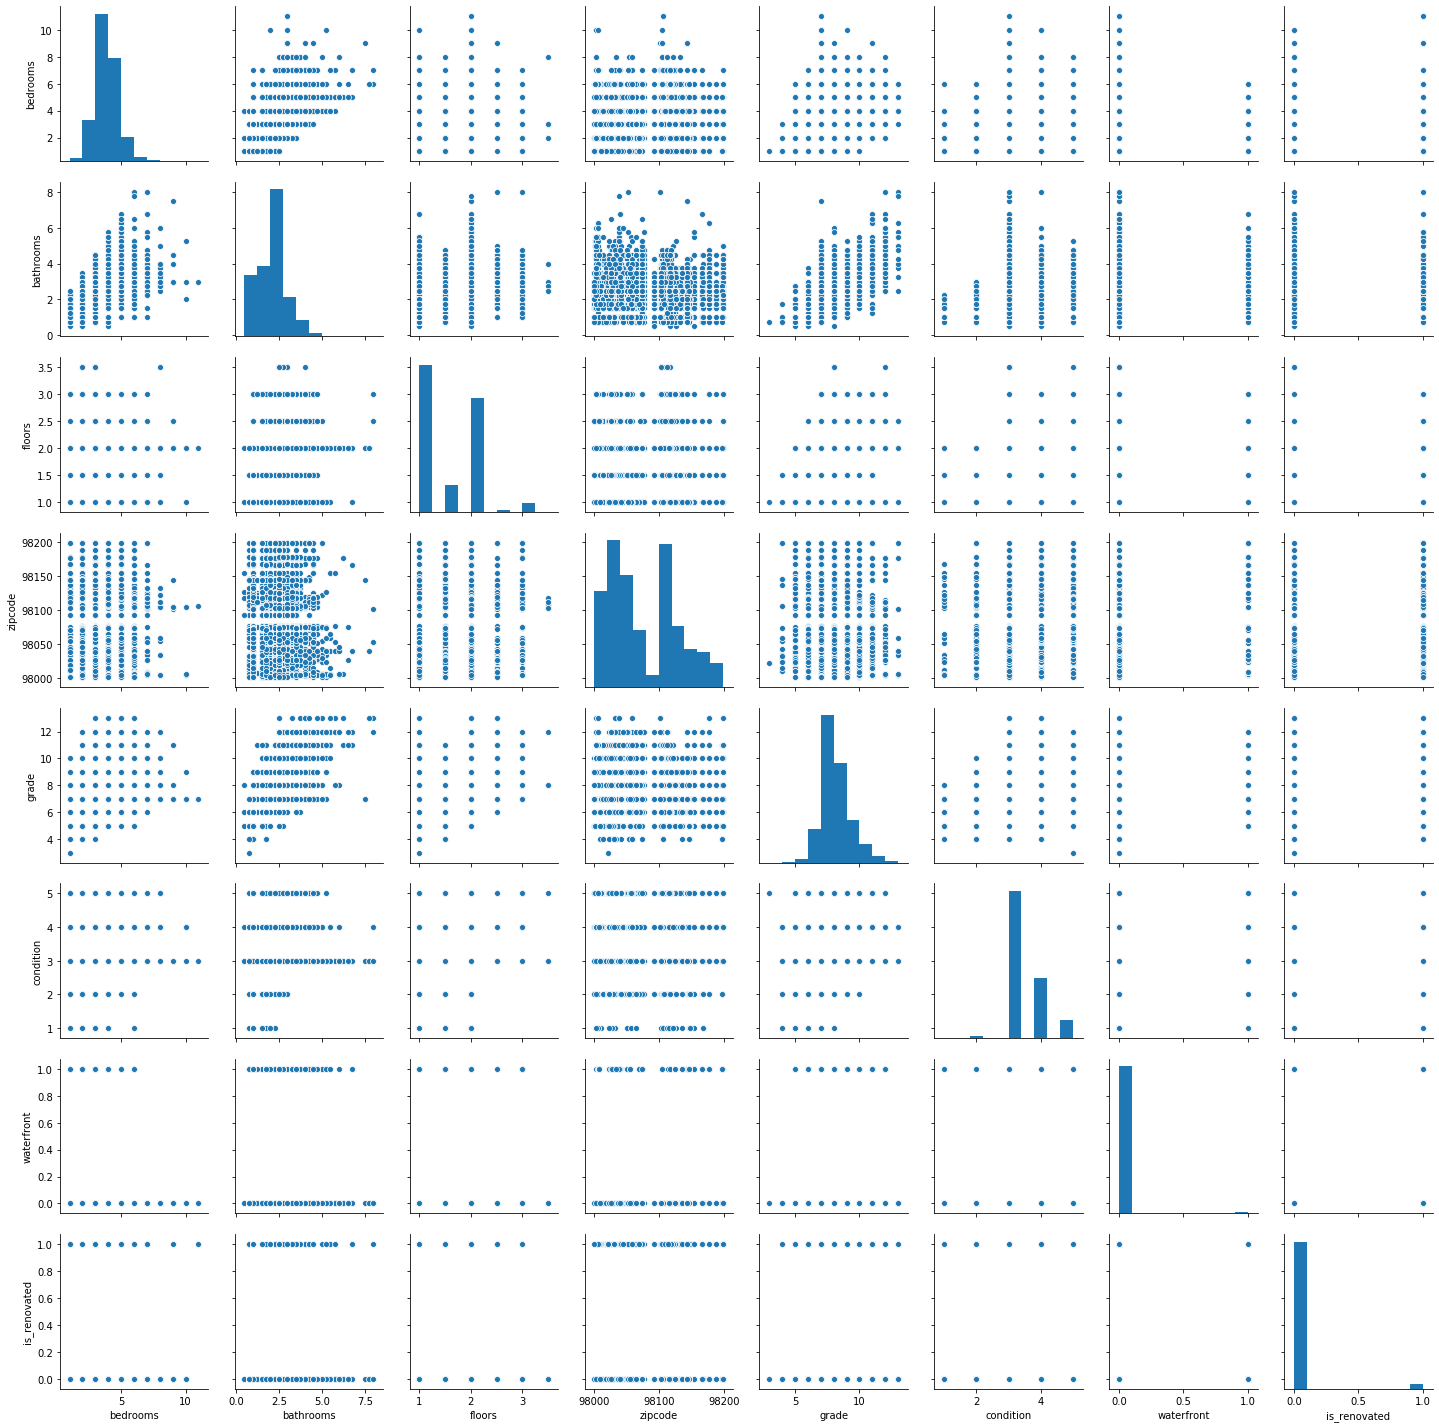

In [23]:
#To check visually for the data to be categorical
sns.pairplot(df[categorical])

In [44]:
df_corr=df.corr()

In [56]:
def Colli_thresh(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val > 0.75 else 'black'
    return 'color: %s' % color

In [57]:
highlight_thresh = df_corr.style.applymap(Colli_thresh)
highlight_thresh

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,is_renovated
price,1,0.315961,0.525915,0.701929,0.0898792,0.25682,0.264308,0.0360307,0.667964,0.605392,0.321103,0.0539645,0.117858,-0.0534087,0.117546
bedrooms,0.315961,1,0.52787,0.593178,0.0336021,0.183707,-0.0020544,0.0234404,0.366174,0.492543,0.303517,0.160736,0.0186259,-0.158588,0.0183543
bathrooms,0.525915,0.52787,1,0.755755,0.0883684,0.502574,0.0636278,-0.126443,0.665834,0.686664,0.278504,0.507166,0.0471731,-0.204778,0.0467383
sqft_living,0.701929,0.593178,0.755755,1,0.173449,0.353941,0.104635,-0.0593966,0.762776,0.876448,0.428683,0.31814,0.0510559,-0.199793,0.0508253
sqft_lot,0.0898792,0.0336021,0.0883684,0.173449,1,-0.00482378,0.021458,-0.00880589,0.114726,0.184134,0.0150381,0.0529389,0.00497713,-0.129582,0.00508895
floors,0.25682,0.183707,0.502574,0.353941,-0.00482378,1,0.0207935,-0.264013,0.458783,0.52397,-0.241845,0.489175,0.00378543,-0.0595222,0.00370488
waterfront,0.264308,-0.0020544,0.0636278,0.104635,0.021458,0.0207935,1,0.0166593,0.0828167,0.0717756,0.0830533,-0.0244908,0.0739385,0.0289252,0.0742667
condition,0.0360307,0.0234404,-0.126443,-0.0593966,-0.00880589,-0.264013,0.0166593,1,-0.146854,-0.158826,0.168431,-0.361555,-0.0557947,0.00283539,-0.0553691
grade,0.667964,0.366174,0.665834,0.762776,0.114726,0.458783,0.0828167,-0.146854,1,0.756069,0.165863,0.447854,0.0156182,-0.185761,0.0152541
sqft_above,0.605392,0.492543,0.686664,0.876448,0.184134,0.52397,0.0717756,-0.158826,0.756069,1,-0.0511485,0.424017,0.0206371,-0.261557,0.020558


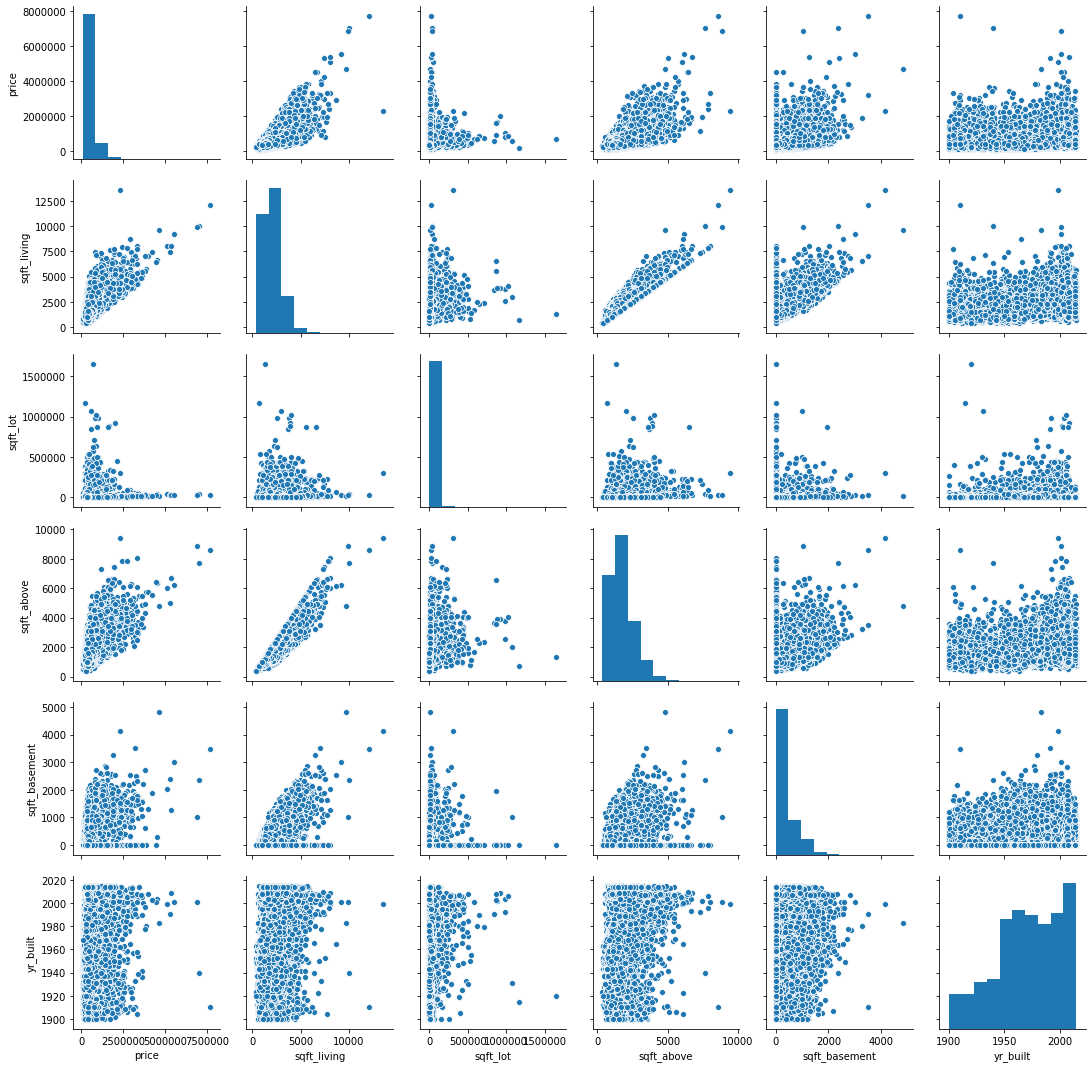

In [24]:
#To check visually for the data to be continous
sns.pairplot(df[continuous])

                  price  sqft_living  sqft_lot  sqft_above  sqft_basement  \
price          1.000000     0.701929  0.089879    0.605392       0.321103   
sqft_living    0.701929     1.000000  0.173449    0.876448       0.428683   
sqft_lot       0.089879     0.173449  1.000000    0.184134       0.015038   
sqft_above     0.605392     0.876448  0.184134    1.000000      -0.051149   
sqft_basement  0.321103     0.428683  0.015038   -0.051149       1.000000   
yr_built       0.053965     0.318140  0.052939    0.424017      -0.130063   

               yr_built  
price          0.053965  
sqft_living    0.318140  
sqft_lot       0.052939  
sqft_above     0.424017  
sqft_basement -0.130063  
yr_built       1.000000  


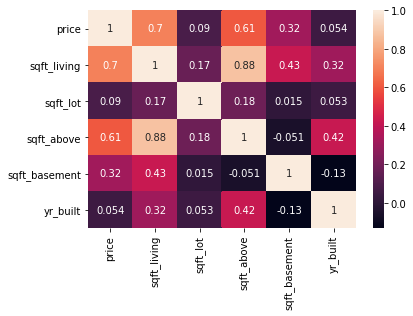

In [29]:
#Correlation among the categorical variables
corr_cont = df[continuous].corr() 
print(corr_cont)

# Mapping the correlation among the continous variable
sns.heatmap(corrr, annot=True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

              bedrooms  bathrooms    floors   zipcode     grade  condition  \
bedrooms      1.000000   0.527870  0.183707 -0.158588  0.366174   0.023440   
bathrooms     0.527870   1.000000  0.502574 -0.204778  0.665834  -0.126443   
floors        0.183707   0.502574  1.000000 -0.059522  0.458783  -0.264013   
zipcode      -0.158588  -0.204778 -0.059522  1.000000 -0.185761   0.002835   
grade         0.366174   0.665834  0.458783 -0.185761  1.000000  -0.146854   
condition     0.023440  -0.126443 -0.264013  0.002835 -0.146854   1.000000   
waterfront   -0.002054   0.063628  0.020794  0.028925  0.082817   0.016659   
is_renovated  0.018354   0.046738  0.003705  0.062383  0.015254  -0.055369   

              waterfront  is_renovated  
bedrooms       -0.002054      0.018354  
bathrooms       0.063628      0.046738  
floors          0.020794      0.003705  
zipcode         0.028925      0.062383  
grade           0.082817      0.015254  
condition       0.016659     -0.055369  
waterfront

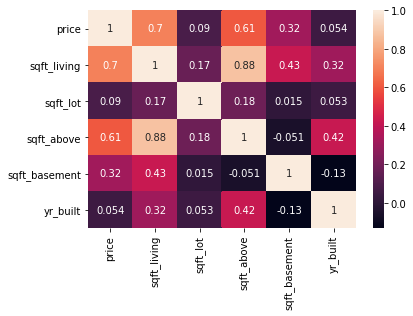

In [53]:
#Correlation among the categorical variables
corr_cat = df[categorical].corr() 
print(corr_cat)
sns.heatmap(corrr, annot=True)

# Mapping the correlation among the categorical variable  
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [61]:
# Since the Multicolinearity threshold value is 0.75, 
# sqft_living and sqft_above shows a colinearity of greater than 0.75,
# So we drop the sqft_above as it reduces us in deriving linear regression with minimal error
df_cont = df.drop(['sqft_above','sqft_living'], axis=1)
df=df.drop(['sqft_above','sqft_living'],axis=1)

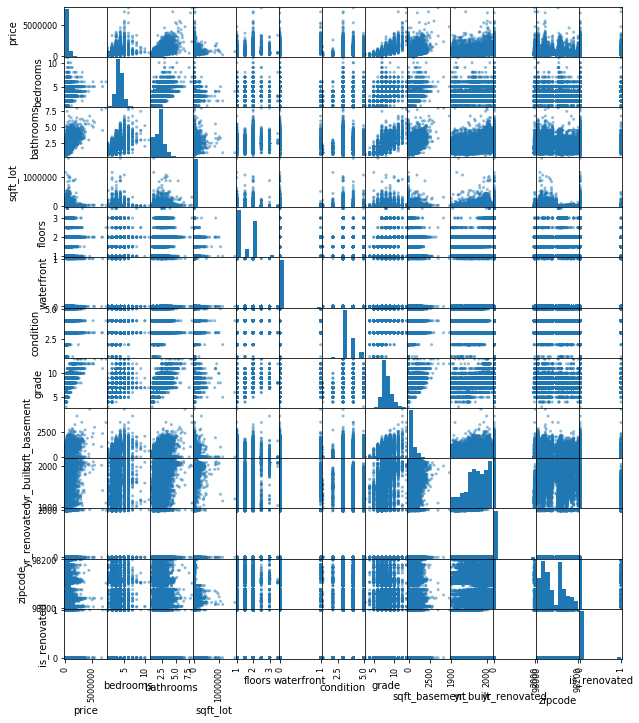

In [65]:
pd.plotting.scatter_matrix(df, figsize=(10,12));

# Normalizing the Data


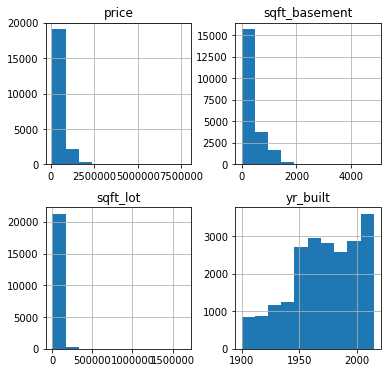

In [68]:
# Continous Variables in Non-Normal Distribution
df[['price', 'sqft_lot','sqft_basement', 'yr_built','date']].hist(figsize  = [6, 6]); 
#  

In [103]:
def norm_feat(series):
    return (series - series.mean())/series.std()
for feat in ['price', 'sqft_lot','sqft_basement', 'yr_built']:
    df[feat] = norm_feat(df[feat])
df.head()

,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,is_renovated
0,2014-10-13,-0.866665,3,1.00,-0.228182,1.0,0.0,3,7,-0.649583,-0.544699,0.0,98178,0.0
1,2014-12-09,-0.006239,3,2.25,-0.189741,2.0,0.0,3,7,0.259869,-0.680867,1991.0,98125,1.0
2,2015-02-25,-0.980717,2,1.00,-0.123144,1.0,0.0,3,6,-0.649583,-1.293624,0.0,98028,0.0
3,2014-12-09,0.173414,4,3.00,-0.243877,1.0,0.0,5,7,1.419420,-0.204279,0.0,98136,0.0
4,2015-02-18,-0.082455,3,2.00,-0.169506,1.0,0.0,3,8,-0.649583,0.544646,0.0,98074,0.0


In [95]:
df.to_csv('Kings_County_Cleaned.csv',index=False)

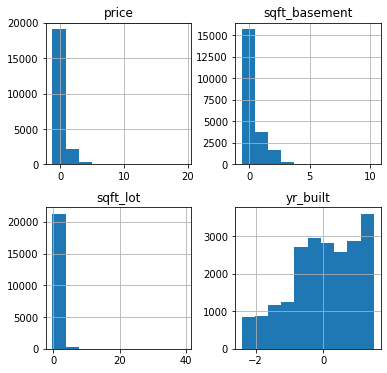

In [102]:
df[['price', 'sqft_lot','sqft_basement', 'yr_built','date']].hist(figsize  = [6, 6]); 

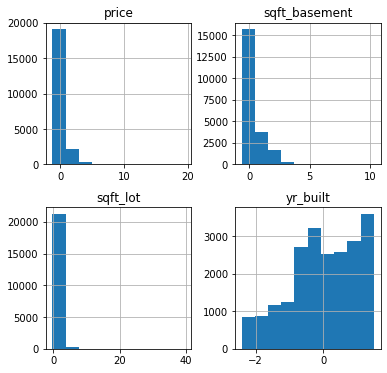

In [104]:
df[['price', 'sqft_lot','sqft_basement', 'yr_built','date']].hist(figsize  = [6, 6]);